In [1]:
# =======================================
# Author: Hung Tran-Nam
# Email: namhung34.info@gmail.com
# Repo: https://github.com/hungtrannam/probclust
# =======================================
# File: vis_dist.py
# Description: Visualize distances between probability distributions
# =======================================

In [2]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import numpy as np
from scipy.stats import norm
from utils import dist
import matplotlib.pyplot as plt
from utils.vis import temp 
from sklearn.neighbors import KernelDensity


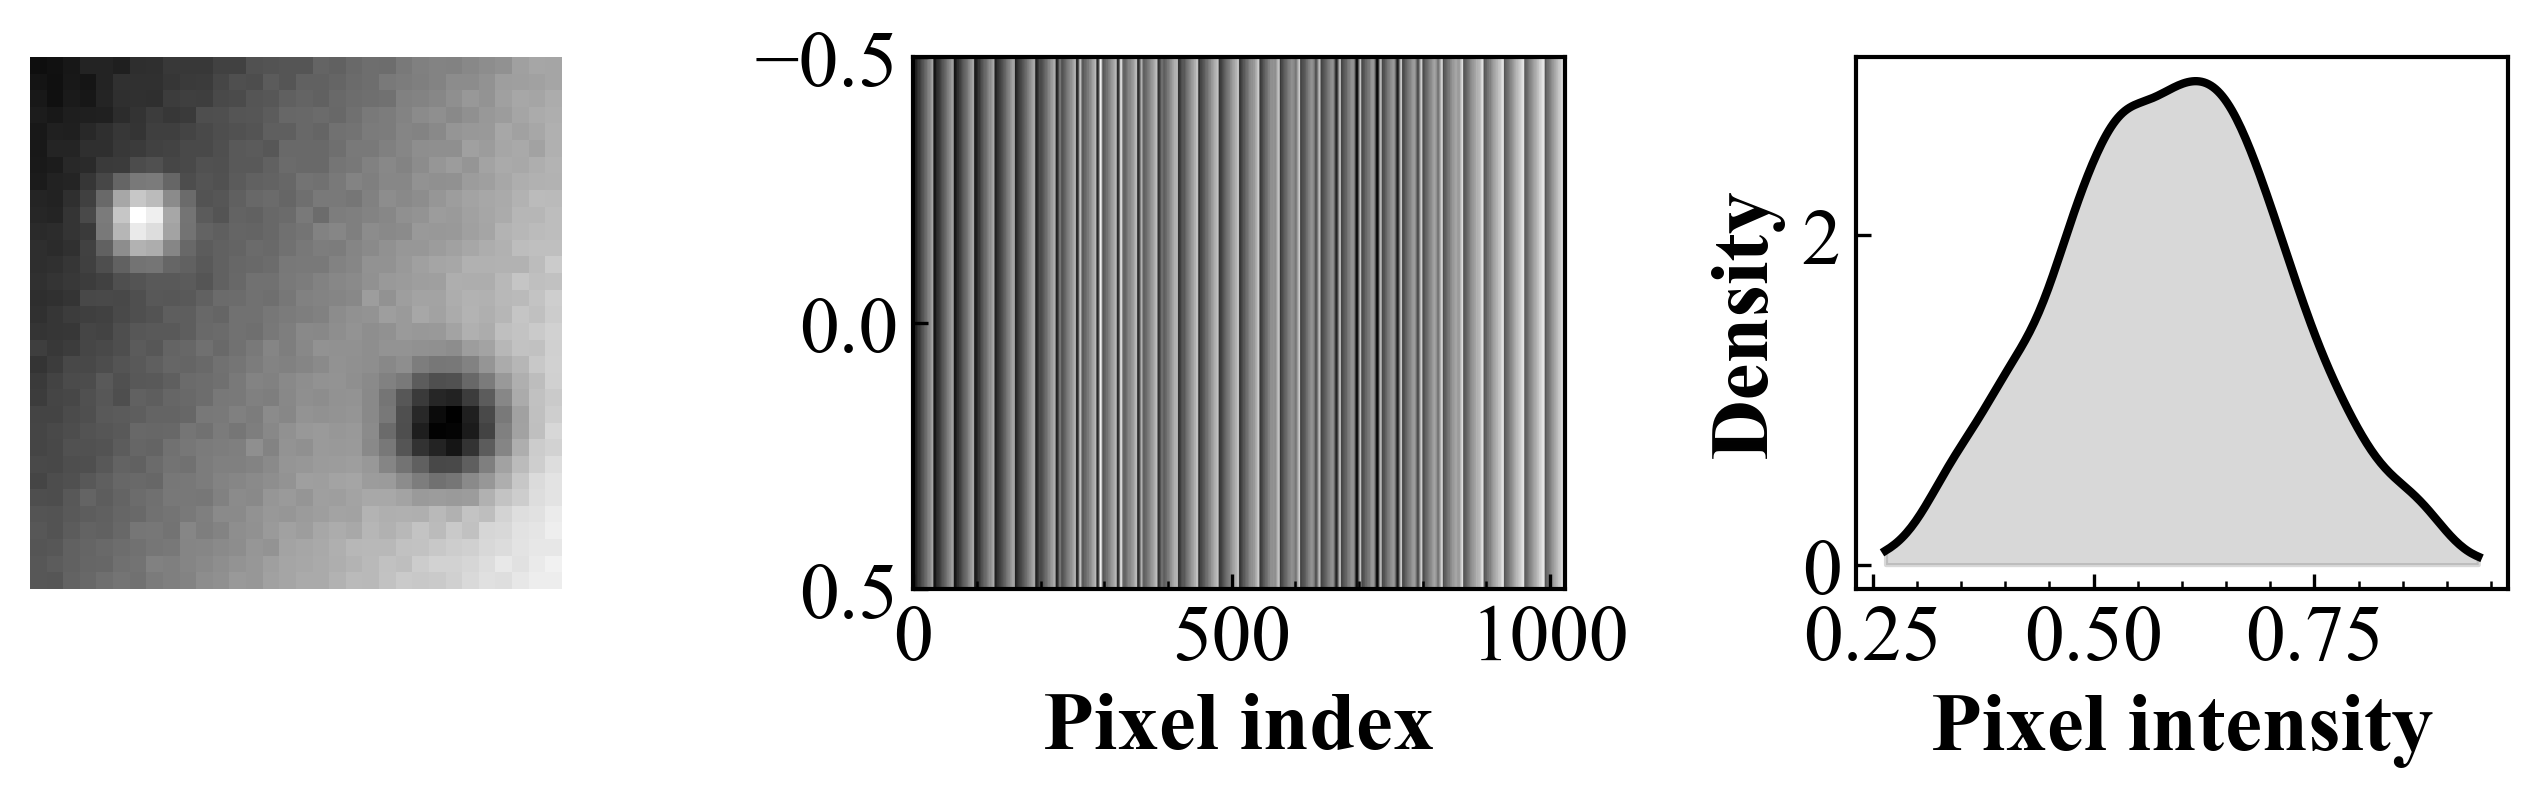

In [7]:
# 1. Tạo ảnh giả lập (gradient + noise)
# Tạo ảnh giả lập KHÔNG dùng hàm sin/cos tuần hoàn, mà dựa trên phân bố Gaussian + gradient
M, N = 32,32
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, M)
X, Y = np.meshgrid(x, y)

# Gradient nền + 2 Gaussian blobs cường độ
image = 0.3 + 0.4*X + 0.2*Y

# Gaussian blob sáng ở góc trái trên
blob1 = np.exp(-((X-0.2)**2 + (Y-0.3)**2)/(2*0.05**2))
# Gaussian blob tối ở góc phải dưới
blob2 = -np.exp(-((X-0.8)**2 + (Y-0.7)**2)/(2*0.08**2))

image += 0.5*blob1 + 0.5*blob2

# Thêm nhiễu nhỏ
image += 0.01*np.random.randn(M, N)
image = np.clip(image, 0, 1)

# 2. Duỗi thẳng thành vector
pixels = image.ravel().reshape(-1, 1)

# 3. Ước lượng mật độ bằng KDE Gauss (Silverman bandwidth approx)
sigma = np.std(pixels)
n = len(pixels)
h = 0.9 * sigma * n ** (-1/5)
kde = KernelDensity(kernel="gaussian", bandwidth=h).fit(pixels)

# 4. Lưới để vẽ mật độ
u = np.linspace(pixels.min(), pixels.max(), 256)[:, None]
log_dens = kde.score_samples(u)
dens = np.exp(log_dens)

# 5. Vẽ minh họa
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

temp(fontsize=18)
axes[0].imshow(image, cmap="gray")
axes[0].axis("off")

axes[1].imshow(pixels.reshape(1, -1), cmap="gray", aspect="auto")
axes[1].set_xlabel("Pixel index")

axes[2].plot(u[:, 0], dens, color='black')
axes[2].fill_between(u[:, 0], dens, color='gray', alpha=0.3)
axes[2].set_xlabel("Pixel intensity")
axes[2].set_ylabel("Density")


plt.tight_layout()
plt.savefig("kde_image_density.pdf", dpi=300)
plt.show()


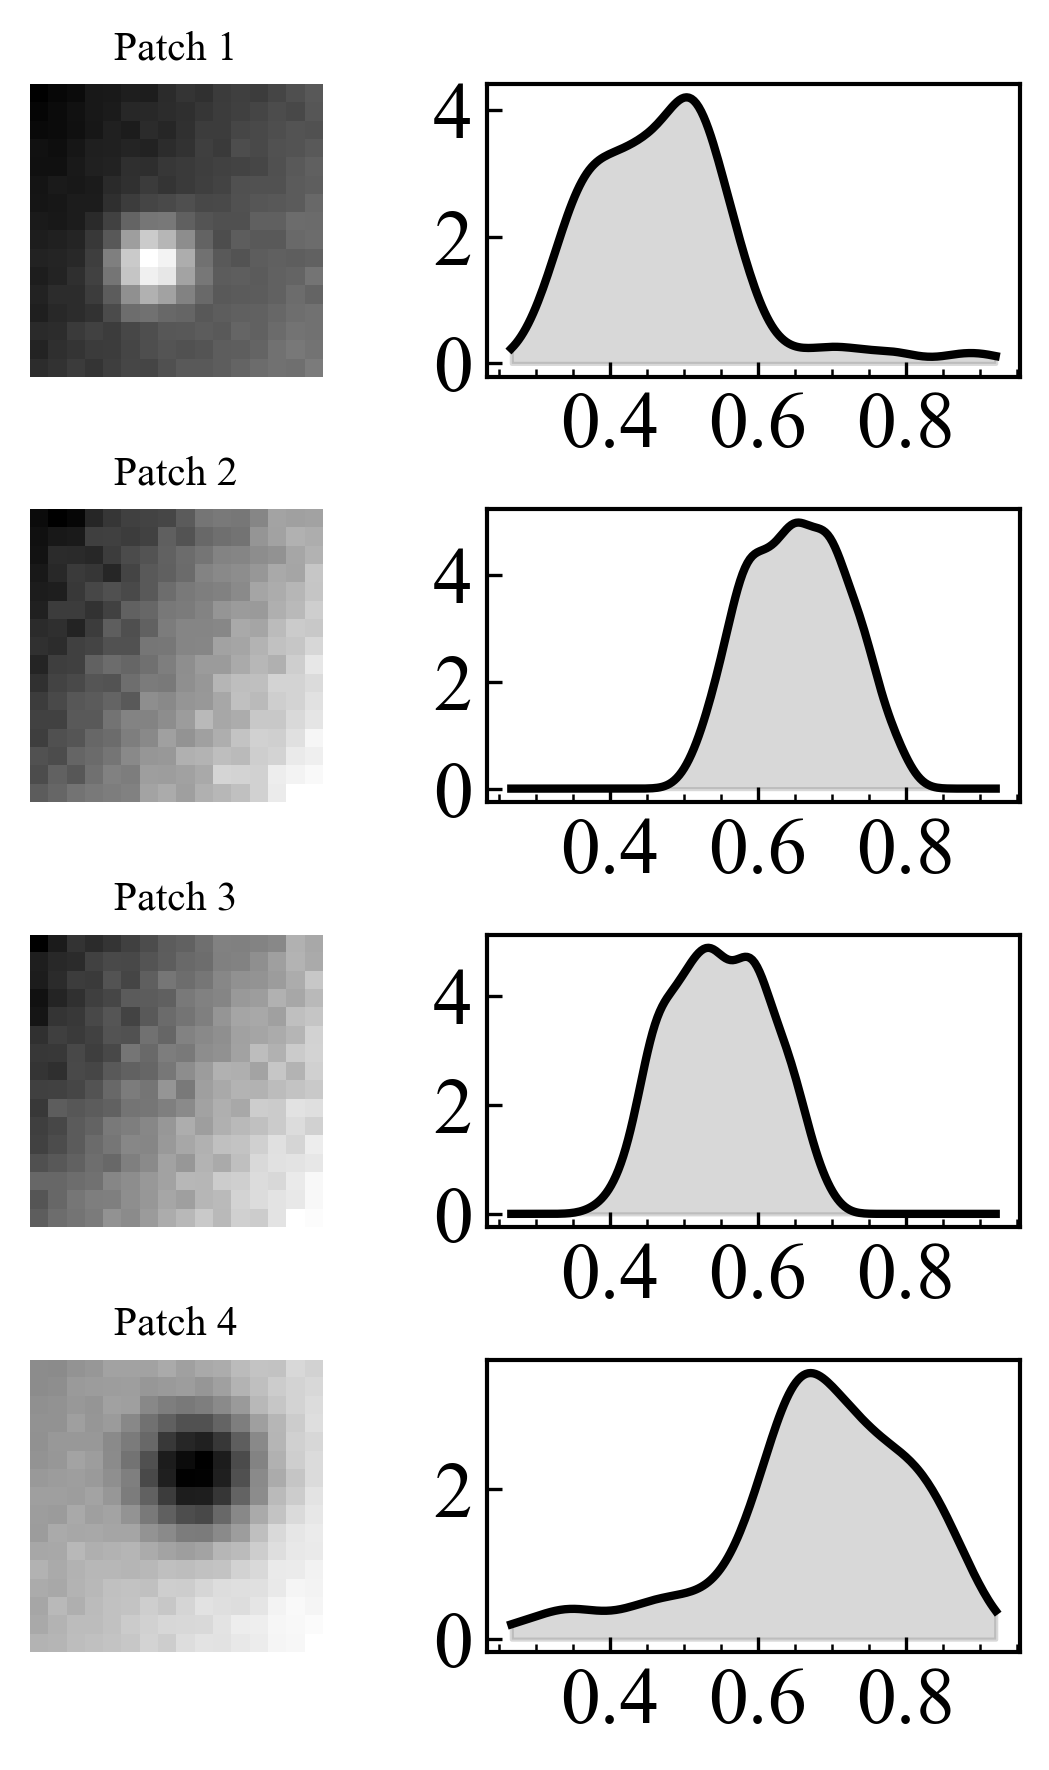

In [5]:
# Vẽ minh họa: ảnh gốc chia patch + mật độ KDE cho từng patch tương ứng

patch_size = 16  # để hình dễ quan sát
patches = []
patch_coords = []

for i in range(0, M, patch_size):
    for j in range(0, N, patch_size):
        patch = image[i:i+patch_size, j:j+patch_size]
        patches.append(patch)
        patch_coords.append((i, j))

# Chọn 4 patch đầu tiên
selected_patches = patches[:4]

# Ước lượng KDE cho 4 patch đầu
densities = []
us = np.linspace(pixels.min(), pixels.max(), 200)[:, None]

for patch in selected_patches:
    data = patch.ravel().reshape(-1, 1)
    sigma = np.std(data)
    n = len(data)
    h = 0.9 * sigma * n ** (-1/5) if sigma > 0 else 0.1
    kde = KernelDensity(kernel="gaussian", bandwidth=h).fit(data)
    log_dens = kde.score_samples(us)
    dens = np.exp(log_dens)
    densities.append(dens)

# Vẽ figure: mỗi patch + mật độ dưới nó
fig, axes = plt.subplots(4, 2, figsize=(4, 6))
temp(10)

for i in range(4):
    # Patch ảnh
    axes[i, 0].imshow(selected_patches[i], cmap="gray")
    axes[i, 0].set_title(f"Patch {i+1}")
    axes[i, 0].axis("off")
    
	 
    
    # Mật độ KDE
    axes[i, 1].plot(us[:, 0], densities[i], color="black")
    axes[i, 1].fill_between(us[:, 0], densities[i], color='gray', alpha=0.3)

plt.tight_layout()
plt.savefig("kde_patches_density.pdf", dpi=300)
plt.show()
